In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.signal import find_peaks
from scipy.signal import butter, filtfilt
import pandas as pd
from datetime import datetime

/home/guts/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
#Load the data

path = "/home/guts/Documents/accel_data/merged_data.csv"
merged_data = pd.read_csv(path)
merged_data['Timestamp'] = pd.to_datetime(merged_data['Timestamp'])
merged_data


,Timestamp,Linear x,Linear y,Linear z,Filtered x,Filtered y,Filtered z,Angular x,Angular y,Angular z
0,2024-08-23 14:24:45,-0.08,0.01,0.14,-0.149835,0.008999,-10.120889,0.006762,-0.004553,0.004431
1,2024-08-23 14:24:53,-0.14,-0.01,0.15,-0.305458,-0.085572,-10.058042,-0.004956,-0.005618,-0.003025
2,2024-08-23 14:25:05,-0.10,0.03,0.10,-0.296480,0.041919,-10.014946,0.002501,0.010361,0.005497
3,2024-08-23 14:25:09,-0.05,0.11,-0.15,-0.257574,-0.110112,-10.016742,0.005697,-0.014140,-0.004091
4,2024-08-23 14:25:14,-0.05,0.01,0.17,-0.142054,-0.128069,-9.561244,-0.008151,0.007165,0.004431
...,...,...,...,...,...,...,...,...,...,...
49195,2024-08-28 09:32:59,0.23,-0.10,-0.38,-2.314792,-1.306016,-8.895657,-0.006021,0.003969,-0.020070
49196,2024-08-28 09:33:04,-0.05,-0.02,-0.10,-1.636634,-0.231618,-9.140464,0.016350,-0.005618,0.011888
49197,2024-08-28 09:33:06,-0.09,-0.03,0.04,-2.512314,-1.347316,-10.022128,-0.011347,0.002904,0.025737
49198,2024-08-28 09:33:07,-0.07,-0.05,-0.27,-2.360282,-1.757323,-8.970475,-0.000695,0.014622,-0.010482


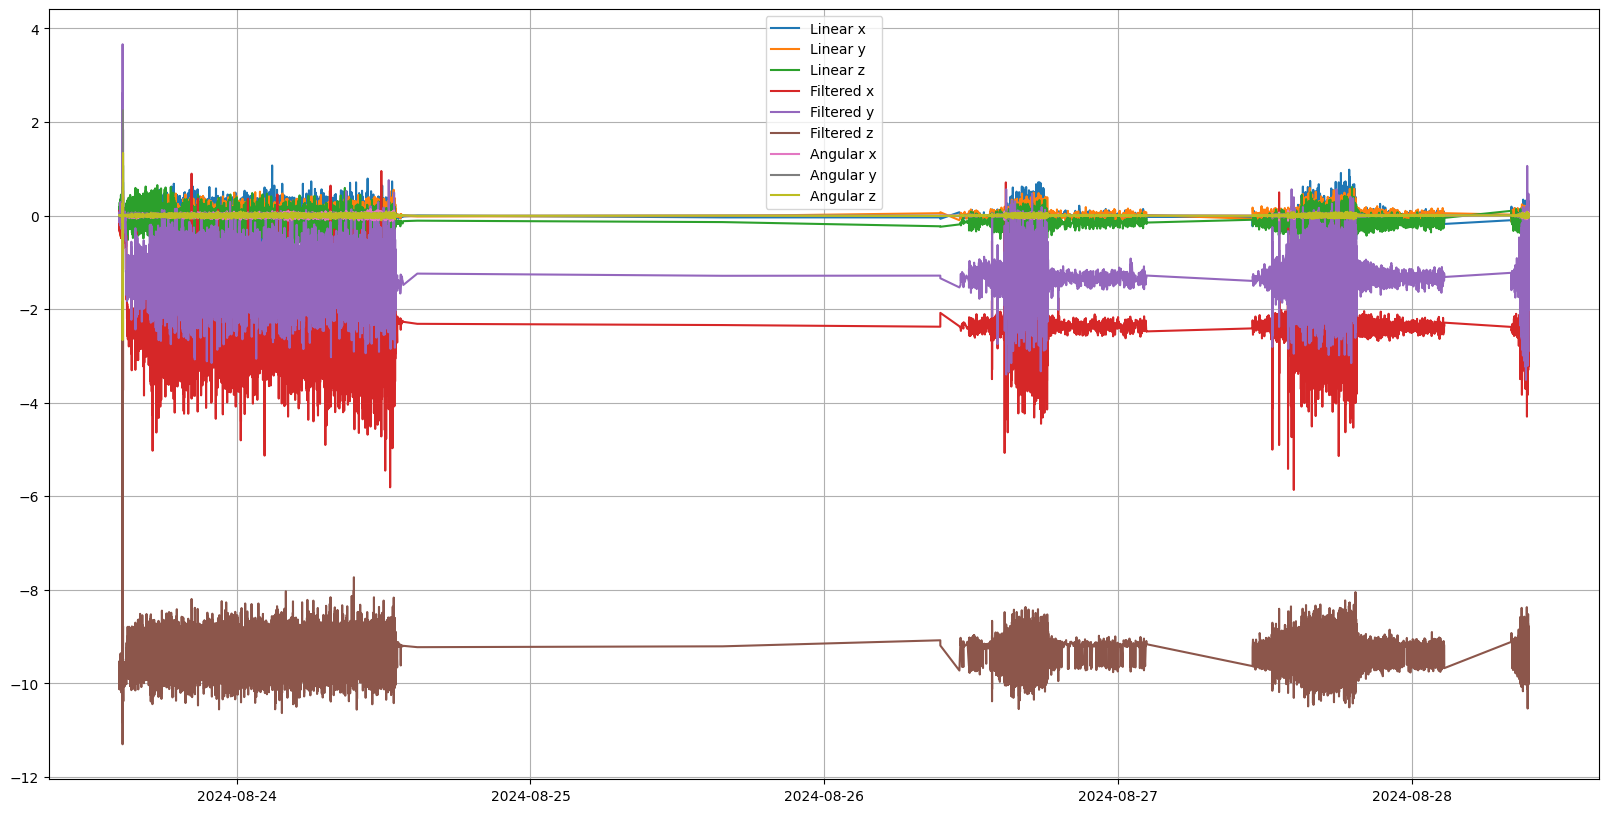

In [4]:
# Plot the data
plt.figure(figsize=(20,10))
for feature in merged_data.columns[1:]:
    plt.plot(merged_data['Timestamp'], merged_data[feature], label=feature)

plt.grid()  
plt.legend()
plt.show()

In [13]:
# Smooth the data
numeric_data = merged_data.drop(columns=['Timestamp'])
smoothed_data = numeric_data.rolling(window=3).mean()
smoothed_data.index = merged_data['Timestamp']
smoothed_data


,Linear x,Linear y,Linear z,Filtered x,Filtered y,Filtered z,Angular x,Angular y,Angular z
Timestamp,,,,,,,,,
2024-08-23 14:24:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-23 14:24:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-23 14:25:05,-0.106667,0.010000,0.130000,-0.250591,-0.011551,-10.064625,0.001436,0.000063,0.002301
2024-08-23 14:25:09,-0.096667,0.043333,0.033333,-0.286504,-0.051255,-10.029910,0.001081,-0.003133,-0.000540
2024-08-23 14:25:14,-0.066667,0.050000,0.040000,-0.232036,-0.065421,-9.864311,0.000016,0.001128,0.001946
...,...,...,...,...,...,...,...,...,...
2024-08-28 09:32:59,0.163333,-0.003333,-0.223333,-2.390209,-1.418544,-9.036715,-0.004601,0.000063,-0.009062
2024-08-28 09:33:04,0.040000,-0.010000,-0.206667,-2.202065,-1.031481,-9.009581,-0.001405,-0.002422,-0.003025
2024-08-28 09:33:06,0.030000,-0.050000,-0.146667,-2.154580,-0.961650,-9.352750,-0.000339,0.000418,0.005852


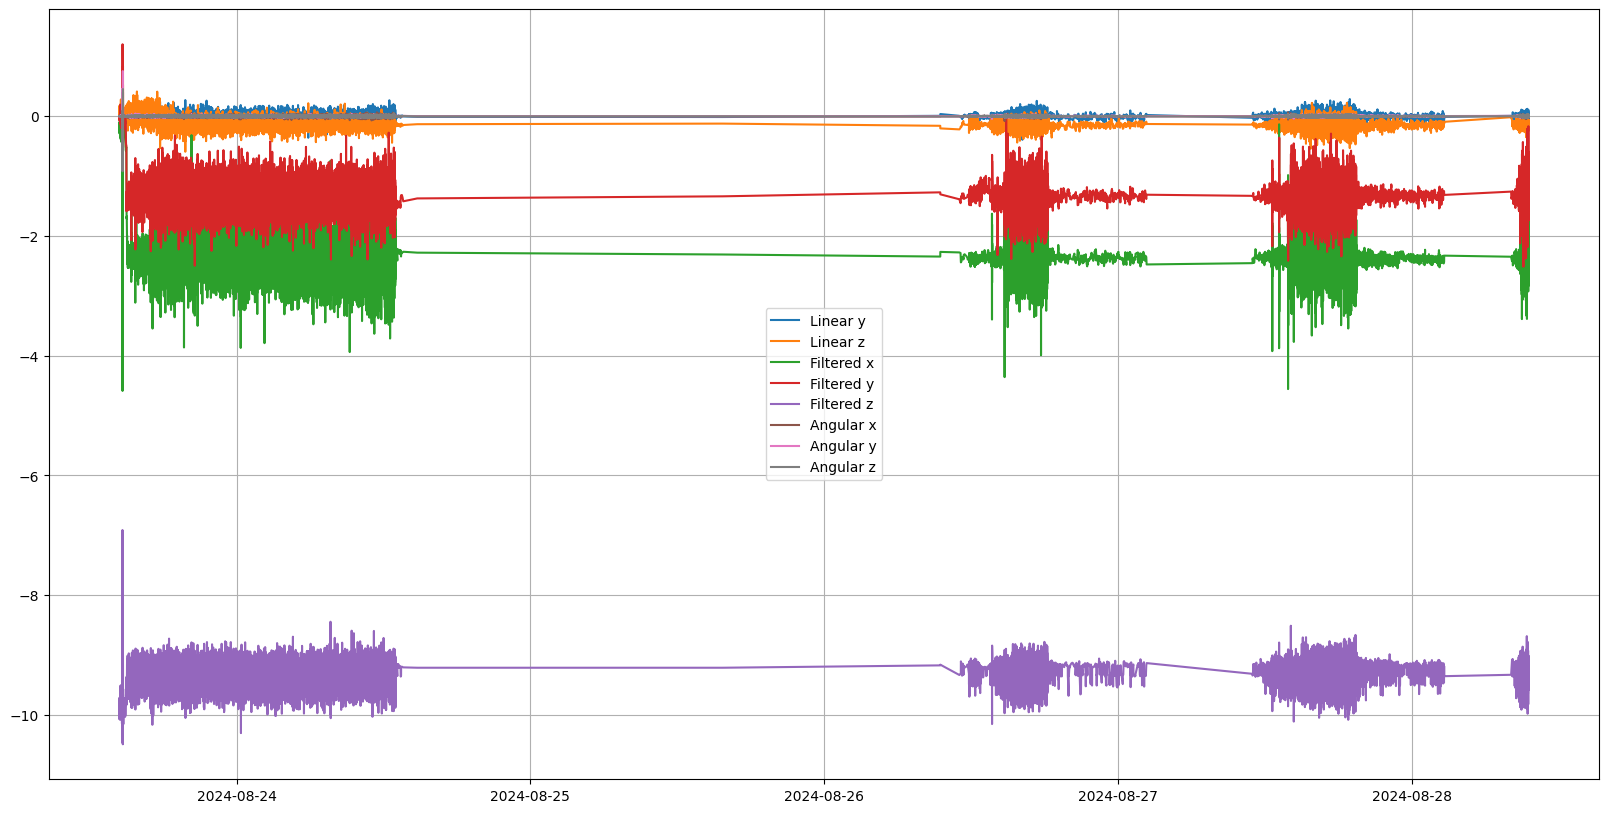

In [14]:
# Plot the smoothed data
plt.figure(figsize=(20,10))
for feature in smoothed_data.columns[1:]:
    plt.plot(merged_data['Timestamp'], smoothed_data[feature], label=feature)

plt.grid()
plt.legend()
plt.show()